# Multiple Linear Regression-50_Startups

## Prepare a prediction model for profit of 50_startups data.

#### Features

##### R&D Spend -- Research and devolop spend in the past few years
##### Administration -- spend on administration in the past few years
##### Marketing Spend -- spend on Marketing in the past few years
##### State -- states from which data is collected
##### Profit  -- profit of each state in the past few years

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Profit with respect to R&D spend, Administration spend, Marketing spend and State
stup_pft = pd.read_csv("50_Startups.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
stup_pft.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# Shape of the data
stup_pft.shape

(50, 5)

In [5]:
# Summary of the data
stup_pft.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# Check the data types
stup_pft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Modifying the dataset

In [7]:
stup_pft=stup_pft.rename(columns={'R&D Spend':'RnD_Exp', 'Administration':'Admin_Exp', 'Marketing Spend':'Mktg_Exp'})
stup_pft.head(10)

,RnD_Exp,Admin_Exp,Mktg_Exp,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Step-2.2 : Handling missing values

In [8]:
# Check for Null values
stup_pft.isnull().sum()

RnD_Exp      0
Admin_Exp    0
Mktg_Exp     0
State        0
Profit       0
dtype: int64

In [9]:
# Check for duplicate values
stup_pft[stup_pft.duplicated()].shape

(0, 5)

In [10]:
stup_pft[stup_pft.duplicated()]

,RnD_Exp,Admin_Exp,Mktg_Exp,State,Profit


### Step-2.3 : Exploring data using Visualisation

#### Histogram

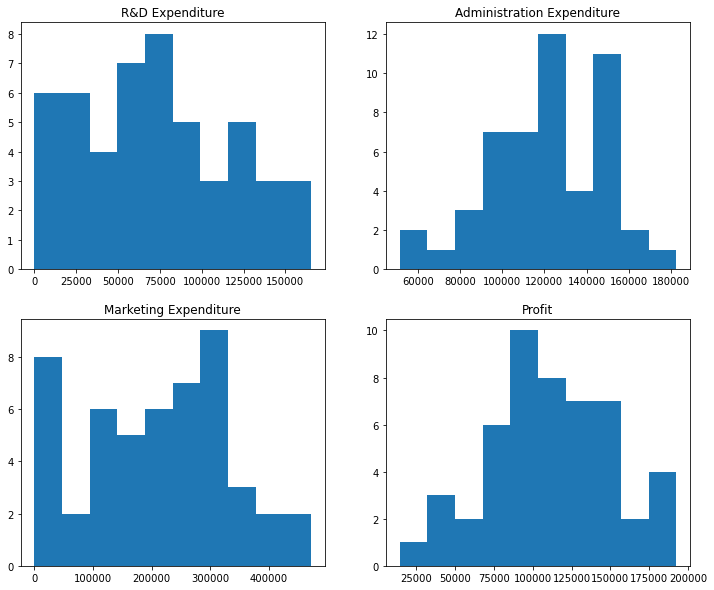

In [11]:
plt.subplots(figsize = (12,10))
plt.subplot(2,2,1)
plt.hist(stup_pft['RnD_Exp'])
plt.title('R&D Expenditure')
plt.subplot(2,2,2)
plt.hist(stup_pft['Admin_Exp'])
plt.title('Administration Expenditure')
plt.subplot(2,2,3)
plt.hist(stup_pft['Mktg_Exp'])
plt.title('Marketing Expenditure')
plt.subplot(2,2,4)
plt.hist(stup_pft['Profit'])
plt.title('Profit')
plt.show()

#### Boxplot

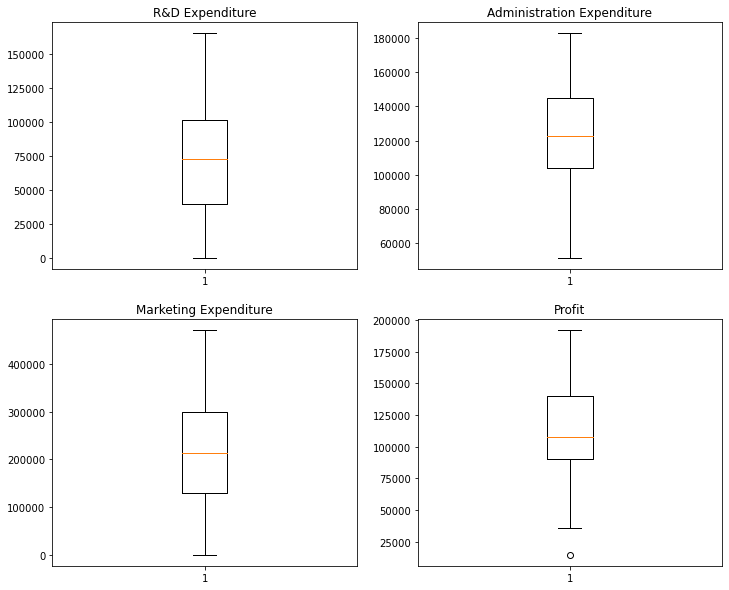

In [12]:
plt.subplots(figsize = (12,10))
plt.subplot(2,2,1)
plt.boxplot(stup_pft['RnD_Exp'])
plt.title('R&D Expenditure')
plt.subplot(2,2,2)
plt.boxplot(stup_pft['Admin_Exp'])
plt.title('Administration Expenditure')
plt.subplot(2,2,3)
plt.boxplot(stup_pft['Mktg_Exp'])
plt.title('Marketing Expenditure')
plt.subplot(2,2,4)
plt.boxplot(stup_pft['Profit'])
plt.title('Profit')
plt.show()

#### We can observe that there is an outlier in the profit column. But in other columns, there are no outliers. The outliers are to be investigated to get accurate model.

#### Distribution plot

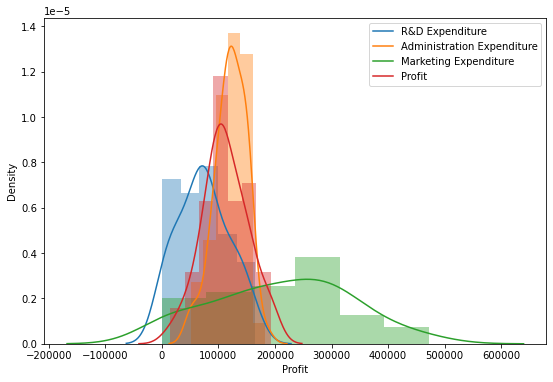

In [13]:
plt.figure(figsize = (9,6))
labels = ['R&D Expenditure', 'Administration Expenditure','Marketing Expenditure','Profit']
sb.distplot(stup_pft['RnD_Exp'])
sb.distplot(stup_pft['Admin_Exp'])
sb.distplot(stup_pft['Mktg_Exp'])
sb.distplot(stup_pft['Profit'])
plt.legend(labels)
plt.show()

#### Q-Q plot

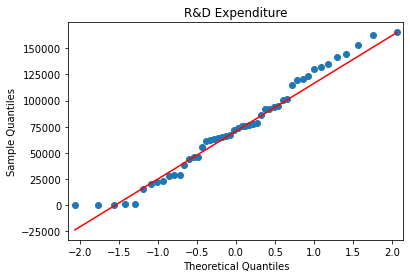

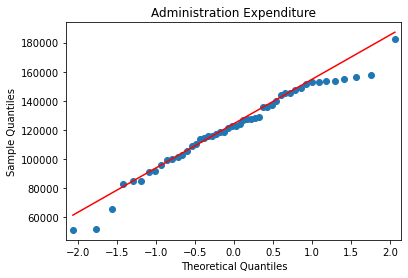

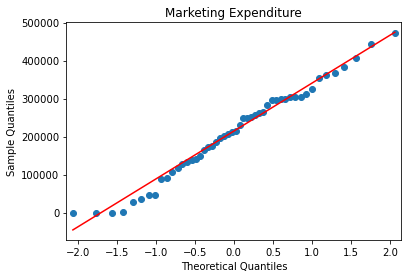

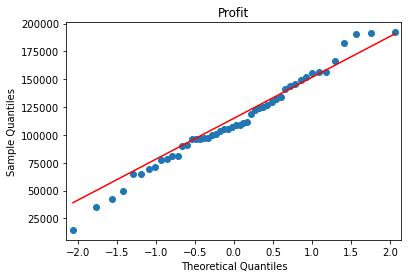

In [14]:
# To check whether the data is following normal distribution
sm.qqplot(stup_pft['RnD_Exp'], line = 'q')
plt.title('R&D Expenditure')
sm.qqplot(stup_pft['Admin_Exp'], line = 'q')
plt.title('Administration Expenditure')
sm.qqplot(stup_pft['Mktg_Exp'], line = 'q')
plt.title('Marketing Expenditure')
sm.qqplot(stup_pft['Profit'], line = 'q')
plt.title('Profit')
plt.show()

#### Correlation and Heat map

In [15]:
# Checking for Correlation between variables
stup_pft.corr()

,RnD_Exp,Admin_Exp,Mktg_Exp,Profit
RnD_Exp,1.000000,0.241955,0.724248,0.972900
Admin_Exp,0.241955,1.000000,-0.032154,0.200717
Mktg_Exp,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


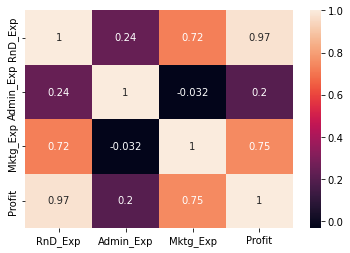

In [16]:
sb.heatmap(stup_pft.corr(),annot=True)
plt.show()

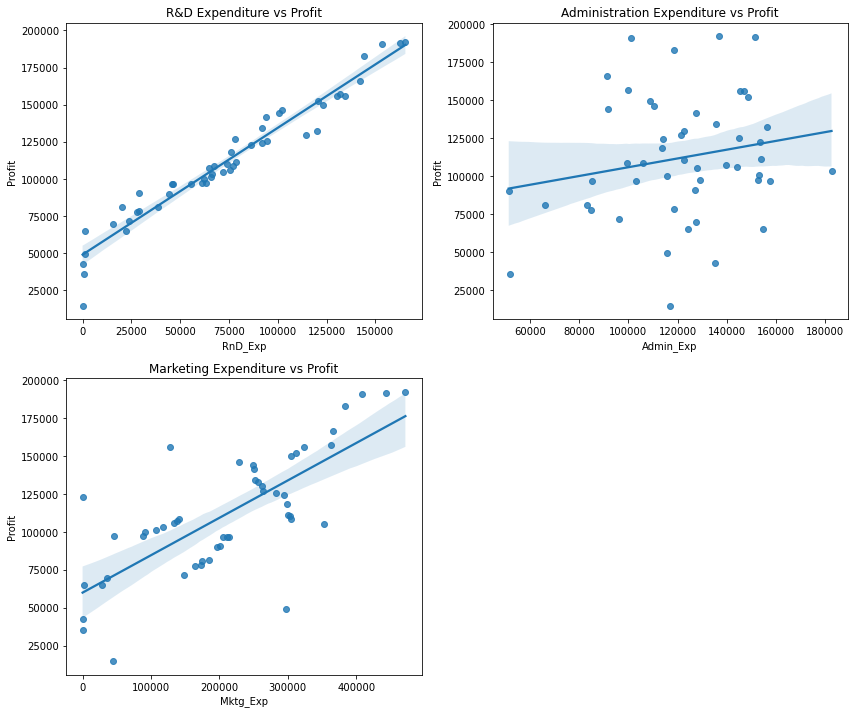

In [17]:
plt.subplots(figsize = (14,12))
plt.subplot(2,2,1)
sb.regplot(x=stup_pft['RnD_Exp'],y=stup_pft['Profit'])
plt.title('R&D Expenditure vs Profit')
plt.subplot(2,2,2)
sb.regplot(x=stup_pft['Admin_Exp'],y=stup_pft['Profit'])
plt.title('Administration Expenditure vs Profit')
plt.subplot(2,2,3)
sb.regplot(x=stup_pft['Mktg_Exp'],y=stup_pft['Profit'])
plt.title('Marketing Expenditure vs Profit')
plt.show()

In [18]:
# There is a good correlation between R&D expenditure and Profit variables.
# The correlation value is more than 0.8 which represents that the variables are strongly related.

#### Pair plot

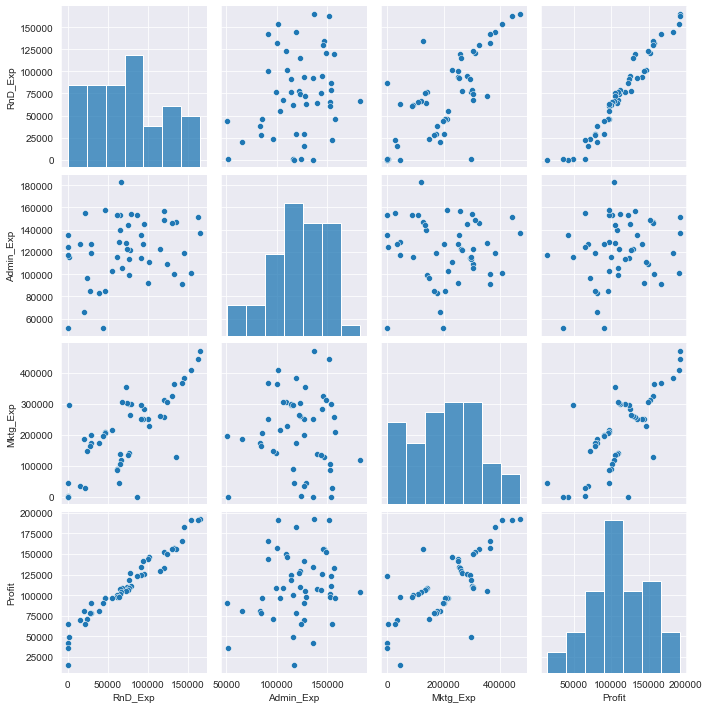

In [19]:
sb.set_style(style='darkgrid')
sb.pairplot(stup_pft)
plt.show()

### Step-3 : Build a Multiple Linear Regeression model

### Step-3.1 : Fitting the model

In [20]:
# The Multiple Linear regression equation is Profit=βo+β1(RnD_Exp)+β2(Admin_Exp)+β3(Mktg_Exp).
# Using the following code we build a Multiple linear regression model, which predicts the profit for given parameters
model=smf.ols("Profit~RnD_Exp+Admin_Exp+Mktg_Exp",data=stup_pft).fit()

#### Printing Estimated Parameters

In [21]:
# We get values of βo,β1,β2,β3
model.params

Intercept    50122.192990
RnD_Exp          0.805715
Admin_Exp       -0.026816
Mktg_Exp         0.027228
dtype: float64

### Step-4 : Model Diagnostics

#### Residuals

In [22]:
# Residuals or errors of the model for each observation. Error = Actual value - Predicted value
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [23]:
# Standardised residuals
model.resid_pearson

array([-0.02809938,  0.28544153,  0.96434012,  0.99707064, -0.64464453,
       -0.71375884, -0.21571863, -0.46237091,  0.05091565, -0.5550843 ,
        1.14953951,  0.94078986,  1.34824679,  0.73863854, -1.83550495,
       -1.76749655,  1.0915467 , -0.52230311, -0.51420652,  0.77354686,
        0.19868872, -0.65058642, -0.4716826 , -0.1367612 , -0.52109528,
        0.5596217 , -0.52717275, -1.01813481,  0.17572521, -0.08560602,
        0.05255627, -0.02212834, -0.1704324 , -0.12305531,  0.83115771,
        0.64641399,  1.67043502,  0.03570086,  1.249048  , -0.29496894,
        0.37086567,  0.32454128,  0.095109  ,  1.03895062,  0.06379481,
        1.87118758, -0.72305186, -0.42577084, -1.462033  , -3.63220515])

#### Predicted values

In [24]:
pred=model.predict(stup_pft)
pred

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


#### Overall Summary

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        23:58:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Exp        0.8057      0.045     17.846      0.000       0.715       0.897
Admin_Exp     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mktg_Exp       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Root Mean Square Error(RMSE)

In [26]:
rmse = np.sqrt(model.mse_resid)
rmse

9232.334837002692

#### From the Summary, we can see that the R² value is good and the Root Mean Square Error value is low.
#### As the pvalues for Administration and Marketing expenditures are greater than 0.05. They seem to be insignificant.

### Step-5 : Treating the Outlier 

#### In the boxplot, we observed that there is an outlier. The same is to be detected now.

### Step-5.1 : Detecting the outlier

#### Using Interquartile range method

In [27]:
Q1 = np.quantile(stup_pft.Profit,0.25)
Q3 = np.quantile(stup_pft.Profit,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 90138.9025 
Third Quartile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper fence = 214206.58999999997 
Lower fence= 15698.290000000023


In [28]:
outlier_IQR = stup_pft[(stup_pft.Profit <= lower_fence) | (stup_pft.Profit >= upper_fence)]
outlier_IQR

,RnD_Exp,Admin_Exp,Mktg_Exp,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


#### Using Statistical outlier detection method

In [29]:
# Calculate the z-scores and select the observation with maximum z-score
outlier_stat = np.abs(stats.zscore(stup_pft.Profit))
np.max(outlier_stat)

2.4393132298487346

In [30]:
stup_pft[outlier_stat==np.max(outlier_stat)]

,RnD_Exp,Admin_Exp,Mktg_Exp,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


#### Hence we can see that the 50th observation in the profit column is the outlier and shall be treated.

### Step-5.2 : Treating the outlier

#### a.) Mean Imputation method

In [31]:
# Replace the outlier value with the mean of the column
stup_pft1 = stup_pft.copy()
for i in stup_pft1['Profit']:
    Q1 = np.quantile(stup_pft1.Profit,0.25)
    Q3 = np.quantile(stup_pft1.Profit,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        stup_pft1['Profit']=stup_pft1['Profit'].replace(i,np.mean(stup_pft1['Profit']))
stup_pft1

,RnD_Exp,Admin_Exp,Mktg_Exp,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.8300
1,162597.70,151377.59,443898.53,California,191792.0600
2,153441.51,101145.55,407934.54,Florida,191050.3900
3,144372.41,118671.85,383199.62,New York,182901.9900
4,142107.34,91391.77,366168.42,Florida,166187.9400
5,131876.90,99814.71,362861.36,New York,156991.1200
6,134615.46,147198.87,127716.82,California,156122.5100
7,130298.13,145530.06,323876.68,Florida,155752.6000
8,120542.52,148718.95,311613.29,New York,152211.7700
9,123334.88,108679.17,304981.62,California,149759.9600


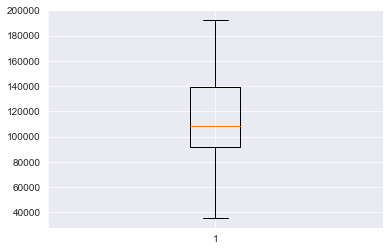

In [32]:
# Check for Outlier
plt.boxplot(stup_pft1['Profit'])
plt.show()

#### b.) Median Imputation method

In [33]:
# Replace the outlier value with the median of the column
stup_pft2 = stup_pft.copy()
for i in stup_pft2['Profit']:
    Q1 = np.quantile(stup_pft2.Profit,0.25)
    Q3 = np.quantile(stup_pft2.Profit,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        stup_pft2['Profit']=stup_pft2['Profit'].replace(i,np.median(stup_pft2['Profit']))
stup_pft2

,RnD_Exp,Admin_Exp,Mktg_Exp,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


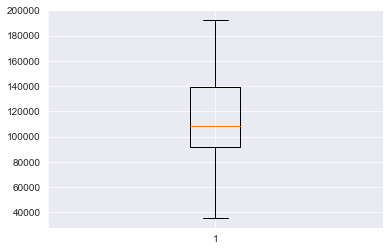

In [34]:
# Check for Outlier
plt.boxplot(stup_pft2['Profit'])
plt.show()

#### c.) Remove the outlier

In [35]:
# Remove entire observation containing the outlier
stup_pft3=stup_pft.copy()
for i in stup_pft3['Profit']:
    Q1 = np.quantile(stup_pft3.Profit,0.25)
    Q3 = np.quantile(stup_pft3.Profit,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        stup_pft3.drop(stup_pft3[stup_pft3['Profit']==i].index,inplace=True)
stup_pft3.shape

(49, 5)

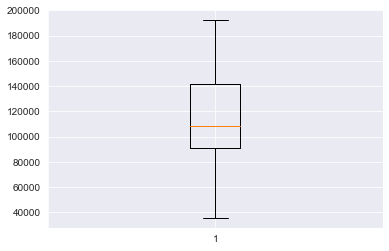

In [36]:
# Check for Outlier
plt.boxplot(stup_pft3['Profit'])
plt.show()

### Step-6 : Apply Transformations to the model

### Step-6.1 : Model after applying Mean imputation method

In [37]:
model_1 = smf.ols("Profit~RnD_Exp+Admin_Exp+Mktg_Exp",data=stup_pft1).fit()

In [38]:
pred_1 = model_1.predict(stup_pft1)
pred_1

0     187675.127497
1     184807.265576
2     177926.392235
3     170378.659289
4     168712.787096
5     160900.156407
6     157113.068012
7     158212.359358
8     150632.944360
9     153144.939630
10    135505.730205
11    135302.864104
12    129722.264382
13    128272.516630
14    148868.575045
15    145436.991421
16    118317.815699
17    130772.988580
18    129323.075827
19    118336.221491
20    117869.780405
21    118908.085181
22    116160.452264
23    111625.413719
24    115210.855428
25    105353.748840
26    113143.881459
27    115772.538953
28    105331.602959
29    105185.754436
30    102685.772937
31    101448.467106
32    102557.991993
33    100727.482761
34     93102.473773
35     93727.951738
36     80104.918383
37     92581.513049
38     74358.300356
39     87537.977965
40     79675.454131
41     79339.888189
42     75647.557056
43     66679.318781
44     71095.077671
45     55187.803363
46     61999.672673
47     54238.659491
48     55849.357211
49     55492.704087


In [39]:
# Overall Summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           2.82e-24
Time:                        23:58:26   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
RnD_Exp        0.7447      0.057     13.162      0.000       0.631       0.859
Admin_Exp     -0.0144      0.064     -0.226      0.823      -0.143       0.114
Mktg_Exp       0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Root Mean Square Error(RMSE)
rmse_1 = np.sqrt(model_1.mse_resid)
rmse_1

11570.325357997475

#### The R² value is decreased and the RMSE value increased.
#### Apply all other transformations and select the model with best R² value and low RMSE.

### Step-6.2 : Model after applying Median imputation method

In [41]:
model_2 = smf.ols("Profit~RnD_Exp+Admin_Exp+Mktg_Exp",data=stup_pft2).fit()

In [42]:
pred_2 = model_2.predict(stup_pft2)
pred_2

0     187876.002847
1     184987.555560
2     178101.351002
3     170516.194441
4     168854.827375
5     161011.270188
6     157154.561362
7     158287.343850
8     150678.903059
9     153217.053278
10    135505.866418
11    135314.090982
12    129698.048453
13    128239.997511
14    148896.764485
15    145470.076076
16    118259.684793
17    130748.924726
18    129310.273815
19    118224.262905
20    117818.791421
21    118842.235189
22    116100.204874
23    111557.898861
24    115134.259100
25    105224.587435
26    113038.459609
27    115715.980803
28    105179.413479
29    105045.204563
30    102551.746204
31    101292.587108
32    102410.565778
33    100610.903671
34     92934.051237
35     93594.631649
36     79905.178020
37     92458.737061
38     74165.103986
39     87380.093611
40     79474.024388
41     79151.812547
42     75439.178305
43     66409.380184
44     70826.322744
45     54875.382974
46     61757.871359
47     53917.496449
48     55572.550636
49     55191.043627


In [43]:
# Overall Summary
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           5.06e-25
Time:                        23:58:27   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RnD_Exp        0.7472      0.055     13.707      0.000       0.638       0.857
Admin_Exp     -0.0149      0.062     -0.242      0.810      -0.139       0.109
Mktg_Exp       0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Root Mean Square Error(RMSE)
rmse_2 = np.sqrt(model_2.mse_resid)
rmse_2

11148.345423622899

### Step-6.3 : Model after removing outlier

In [45]:
model_3 = smf.ols("Profit~RnD_Exp+Admin_Exp+Mktg_Exp",data=stup_pft3).fit()

In [46]:
pred_3 = model_3.predict(stup_pft3)
pred_3

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [47]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           8.85e-32
Time:                        23:58:27   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD_Exp        0.7830      0.038     20.470      0.000       0.706       0.860
Admin_Exp     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Mktg_Exp       0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Root Mean Square Error(RMSE)
rmse_3 = np.sqrt(model_3.mse_resid)
rmse_3

7753.807752288891

#### Out of all the transformations, the model after removing the outlier has the best R² value and less RMSE value.

#### As the 'State' column does not influence the profit, remove the column.

In [49]:
stup_pft4=stup_pft3.drop('State',axis=1)
stup_pft4.head()

,RnD_Exp,Admin_Exp,Mktg_Exp,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Step-7 : Check the significance of each indpendent variable

#### Perform Simple linear regression on each variable and check the significance. If the P-value<0.05, then it is significant.

#### Check for Significance of R&D Expenditure

In [50]:
Slr_Rnd = smf.ols("Profit~RnD_Exp",data=stup_pft4).fit()

In [51]:
Slr_Rnd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           7.56e-34
Time:                        23:58:27   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RnD_Exp        0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As the P-value<0.05, R & D expenditure is significant  to the model.

#### Check for Significance of Administration Expenditure

In [52]:
Slr_Admin = smf.ols("Profit~Admin_Exp",data=stup_pft4).fit()

In [53]:
Slr_Admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.156
Time:                        23:58:27   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
Admin_Exp      0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As the P-value>0.05, Administration expenditure is insignificant  to the model.

#### Check for Significance of  Marketing Expenditure

In [54]:
Slr_Mktg = smf.ols("Profit~Mktg_Exp",data=stup_pft4).fit()

In [55]:
Slr_Mktg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           1.30e-09
Time:                        23:58:27   Log-Likelihood:                -566.59
No. Observations:                  49   AIC:                             1137.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.406e+04   7601.574      8.428      0.000    4.88e+04    7.94e+04
Mktg_Exp       0.2329      0.031      7.527      0.000       0.171       0.295
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As the P-value<0.05, Marketing expenditure is significant  to the model.

#### The RnD expenditure and Marketing expenditure are independently significant. 
#### Let us see whether they are combinedly showing the same.

#### Combination of R&D expenditure and Marketing expenditure

In [56]:
RnD_Mktg = smf.ols("Profit~RnD_Exp+Mktg_Exp",data=stup_pft4).fit()

In [57]:
RnD_Mktg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           3.74e-33
Time:                        23:58:27   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD_Exp        0.7754      0.035     22.136      0.000       0.705       0.846
Mktg_Exp       0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# Root Mean Square Error(RMSE)
rmse_RnD_Mktg = np.sqrt(RnD_Mktg.mse_resid)
rmse_RnD_Mktg

7691.884748549171

#### The above model is showing good R² value and both the variables are significant to the model, as the P-values are <0.05. However check for multicollinearity by calculating Variance Inflation factor.

### Step-8 : Calculate Variance Inflation Factor

In [59]:
rsq_RnD = smf.ols('RnD_Exp~Mktg_Exp+Admin_Exp',data=stup_pft4).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD)
vif_RnD

2.3777540899785308

In [60]:
rsq_Mktg = smf.ols('Mktg_Exp~RnD_Exp+Admin_Exp',data=stup_pft4).fit().rsquared  
vif_Mktg = 1/(1-rsq_Mktg)
vif_Mktg

2.2399568221016826

#### We have to remove the variable which is having the highest Variance Inflation factor(VIF). But here both the variables are having almost same VIF value.
#### So, Build two models eliminating one variable in each model.

In [61]:
RnD_Admin = smf.ols("Profit~RnD_Exp+Admin_Exp",data=stup_pft4).fit()

In [62]:
RnD_Admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           1.69e-32
Time:                        23:58:27   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RnD_Exp        0.8349      0.026     31.847      0.000       0.782       0.888
Admin_Exp     -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# Root Mean Square Error(RMSE)
rmse_RnD_Admin = np.sqrt(RnD_Admin.mse_resid)
rmse_RnD_Admin

7947.922013017297

In [64]:
Mktg_Admin = smf.ols("Profit~Mktg_Exp+Admin_Exp",data=stup_pft4).fit()

In [65]:
Mktg_Admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           6.59e-10
Time:                        23:58:27   Log-Likelihood:                -563.45
No. Observations:                  49   AIC:                             1133.
Df Residuals:                      46   BIC:                             1139.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.519e+04   1.71e+04      1.474      0.147   -9208.231    5.96e+04
Mktg_Exp       0.2356      0.029      8.027      0.000       0.177       0.295
Admin_Exp      0.3152      0.126      2.508      0.016       0.062       0.568
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Root Mean Square Error(RMSE)
rmse_Mktg_Admin = np.sqrt(Mktg_Admin.mse_resid)
rmse_Mktg_Admin

24626.081616195454

#### Therefore, as the R² value for R&D feature is greater than Marketing feature, include R&D feature and remove Marketing feature.

#### In the R&D feature model, the Administration feature shows insignificance. So eliminate it and build a model with only R&D feature.

In [67]:
RnD = smf.ols("Profit~RnD_Exp",data=stup_pft4).fit()

In [68]:
RnD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           7.56e-34
Time:                        23:58:27   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RnD_Exp        0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# Root Mean Square Error(RMSE)
rmse_RnD = np.sqrt(RnD.mse_resid)
rmse_RnD

7967.4713794050385

### Step-9 : Final Results

In [70]:
results = {"MODEL":pd.Series(["Given data","Mean Imputation model","Median Imputation model","After removing outlier","Comb. of R&D and Marketing","Comb. of R&D and Administration","Comb. of Marketing and Administration","Only R&D"]),
           "R²_Values":pd.Series([model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared,RnD_Mktg.rsquared,RnD_Admin.rsquared,Mktg_Admin.rsquared,RnD.rsquared]),
           "RMSE_Values":pd.Series([rmse,rmse_1,rmse_2,rmse_3,rmse_RnD_Mktg,rmse_RnD_Admin,rmse_Mktg_Admin,rmse_RnD])
          }
result_table=pd.DataFrame(results)
result_table 

,MODEL,R²_Values,RMSE_Values
0,Given data,0.950746,9232.334837
1,Mean Imputation model,0.911954,11570.325358
2,Median Imputation model,0.918296,11148.345424
3,After removing outlier,0.961316,7753.807752
4,Comb. of R&D and Marketing,0.961086,7691.884749
5,Comb. of R&D and Administration,0.958452,7947.922013
6,Comb. of Marketing and Administration,0.601127,24626.081616
7,Only R&D,0.957340,7967.471379


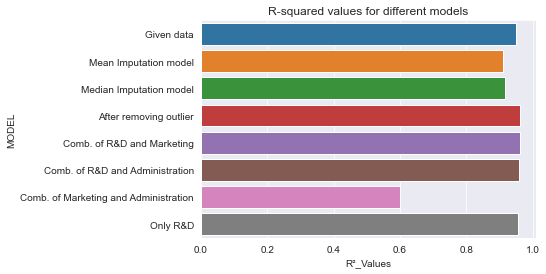

In [71]:
sb.barplot(x=result_table['R²_Values'],y=result_table['MODEL'])
plt.title("R-squared values for different models")
plt.show()

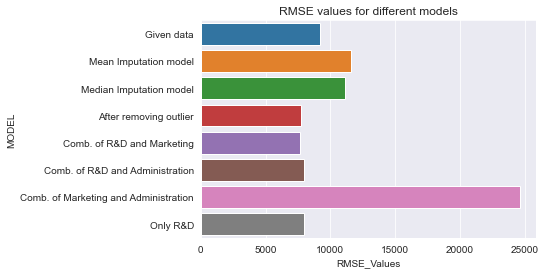

In [72]:

sb.barplot(x=result_table['RMSE_Values'],y=result_table['MODEL'])
plt.title("RMSE values for different models")
plt.show()

#### From the above results, we can see that the model using combination of R&D expenditure and Marketing feature gives the best R² value and less RMSE value
#### Hence this model can be selected as our final model and used for predicting the profit.

### Step-10 : Residual Analysis

#### Q-Q Plot

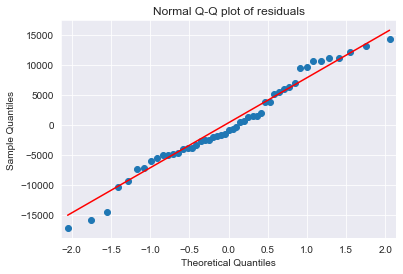

In [73]:
#Residuals values or errors
sm.qqplot(RnD_Mktg.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### Test for Homoscedasticity

In [74]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

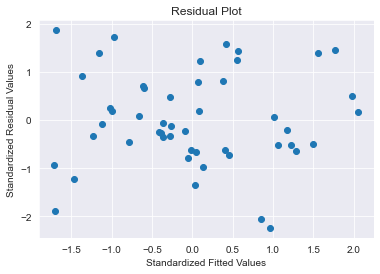

In [75]:
plt.scatter(get_standardized_values(RnD_Mktg.fittedvalues), RnD_Mktg.resid_pearson)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

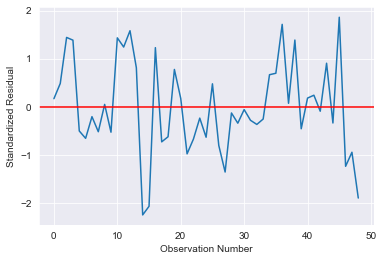

In [76]:
plt.plot(np.arange(len(stup_pft4)),RnD_Mktg.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 
plt.show()

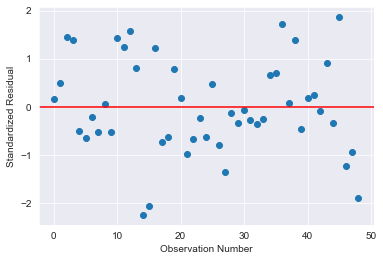

In [77]:
plt.scatter(np.arange(len(stup_pft4)),RnD_Mktg.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.show()

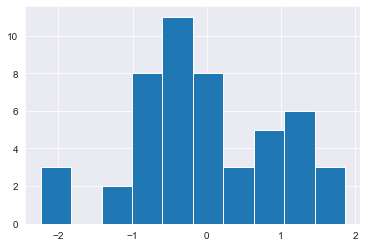

In [78]:
plt.hist(RnD_Mktg.resid_pearson)
plt.show()

#### Residual VS Regressors

eval_env: 1


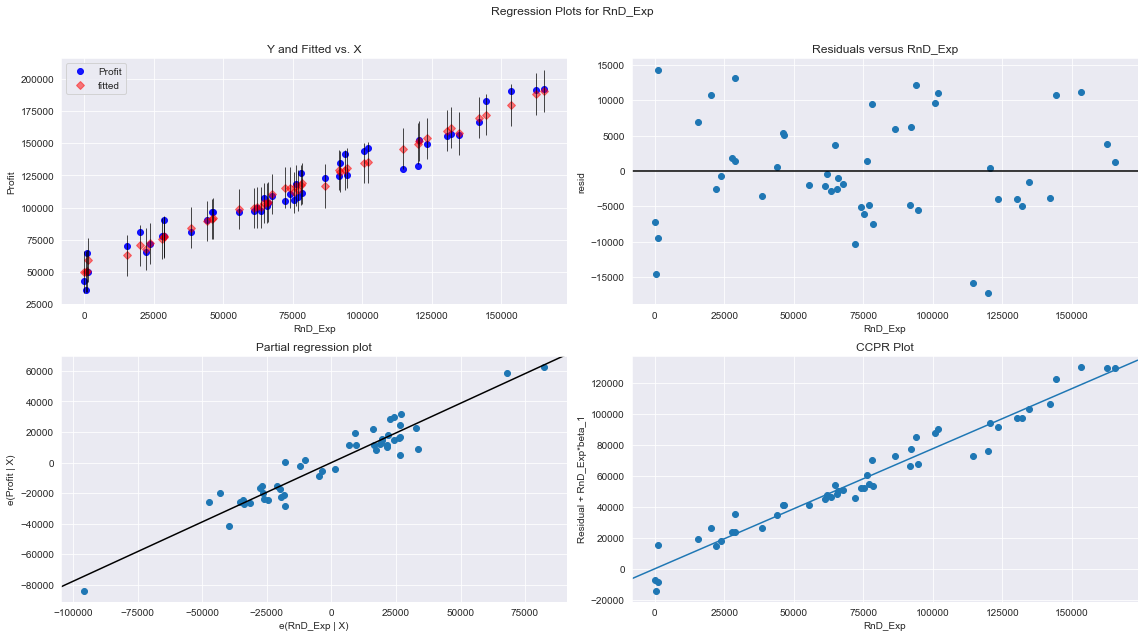

In [79]:
fig = plt.figure(figsize = (16,9))
plot_RnD = sm.graphics.plot_regress_exog(RnD_Mktg, 'RnD_Exp', fig=fig)
plt.show()

eval_env: 1


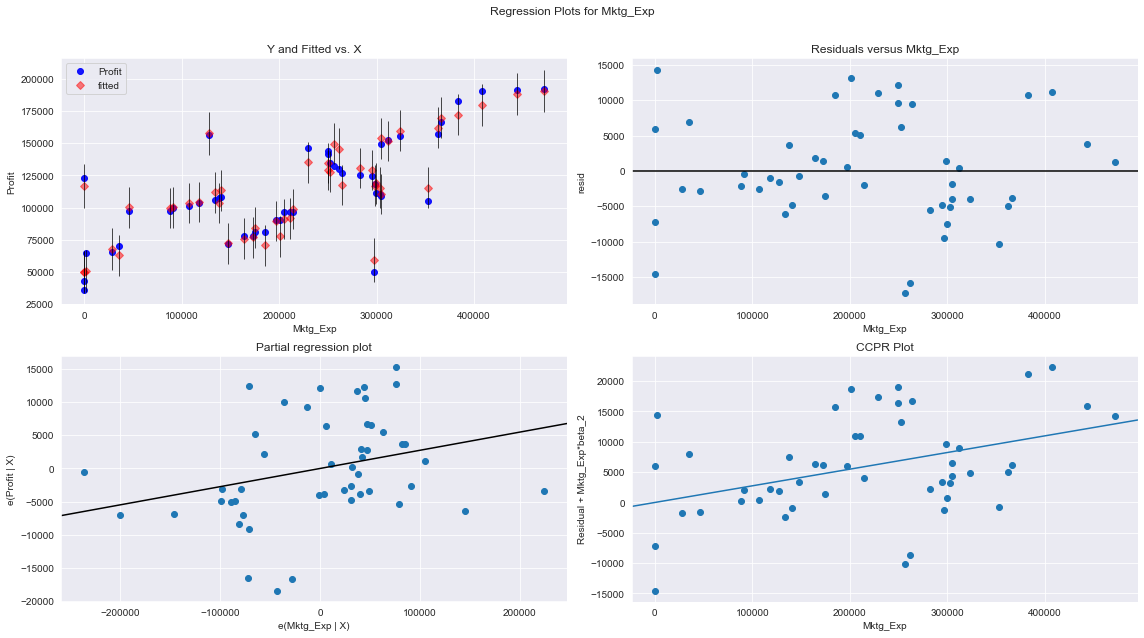

In [80]:
fig = plt.figure(figsize = (16,9))
plot_RnD = sm.graphics.plot_regress_exog(RnD_Mktg, 'Mktg_Exp', fig=fig)
plt.show()

### Step-11 : Detecting Influencers in the Model

#### By using Cook's distance

In [81]:
influence_points=RnD_Mktg.get_influence()
c, p_value=influence_points.cooks_distance

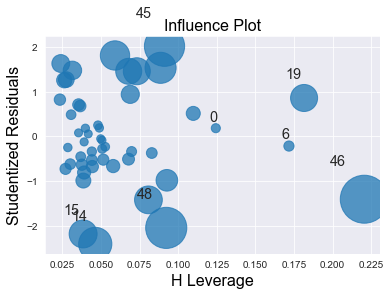

In [82]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(RnD_Mktg)
plt.show()

#### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [83]:
k=stup_pft4.shape[1]
n=stup_pft4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


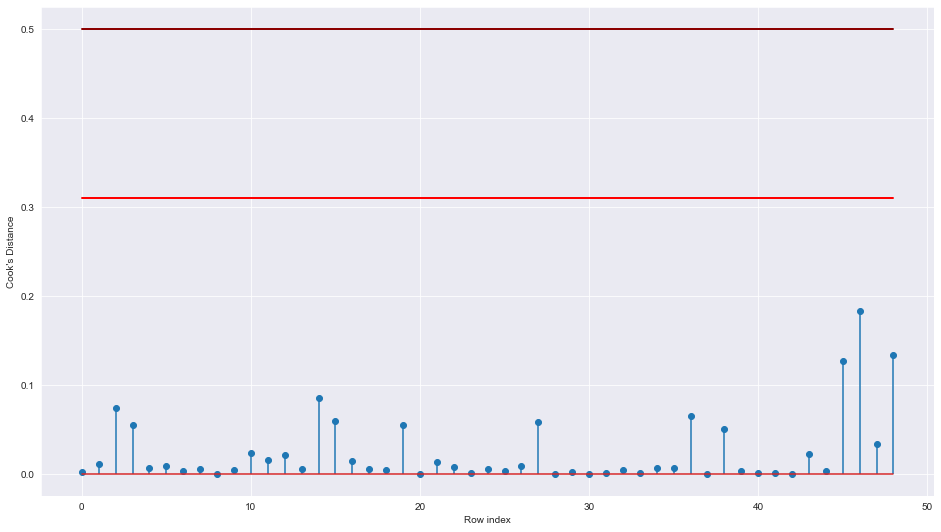

In [84]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(stup_pft4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

 #### Hence, we can say that there are no influencers present in our model.

### Step-12 : Using the model for new data

In [85]:
#Predict for new data
newdata={'RnD_Exp':[100000,200000,300000],'Mktg_Exp':[100000,200000,100000]}

In [86]:
data_pred=pd.DataFrame(newdata,columns=['RnD_Exp','Mktg_Exp'])
data_pred

,RnD_Exp,Mktg_Exp
0,100000,100000
1,200000,200000
2,300000,100000


In [87]:
new_pred = RnD_Mktg.predict(data_pred)
data_pred['Pred_Profit']=np.round(new_pred,2)
data_pred

,RnD_Exp,Mktg_Exp,Pred_Profit
0,100000,100000,130068.21
1,200000,200000,210351.14
2,300000,100000,285144.98


#### Hence the Multiple Linear Regression model gives accurate predictions.